<img src="https://logos-download.com/wp-content/uploads/2016/12/National_University_of_Singapore_logo_NUS.png" style="float: left; margin: 20px; height: 55px">

# Hypothesis Testing

In [121]:
# Importing NumPy and Pandas.
import numpy as np
import pandas as pd

# Importing matplotlib.pyplot - the specific plotting API 
# https://matplotlib.org/api/pyplot_api.html
import matplotlib.pyplot as plt

# Import Seaborn.
import seaborn as sns

from statistics import mean


# Function for Biased Die

In [122]:
def biased_die(n, p):
    count = 0        
    for i in range(n): 
        
        while True:    
            die_throw = np.random.choice(['success','others'],
                                         p = [p, 1 - p])
            
            if die_throw == 'success': 
                    count += 1    
            break               
                     
    return (count / n)*100

# Probability of Fair Die

In [123]:
(1/6)*100

16.666666666666664

# n Independent Trials

In [124]:
biased_die(10, 0.33)

30.0

In [125]:
np.random.seed(6)
biased_die(1000, 0.33)

24.0

In [126]:
biased_die(10000, 0.33)

32.690000000000005

# N experiments of n trials each

In [127]:
n = 1000 # n is the number of trial in each experiment

In [141]:
p = 0.33 # p is the determined probability of success

In [128]:
trial_list = []

In [142]:
for i in range(100):
    np.random.seed(i)
    x = biased_die(n, p)
    trial_list.append(x)

In [143]:
trial_list[:10]

[33.5, 32.7, 34.1, 32.6, 31.4, 32.0, 33.7, 33.6, 31.5, 31.0]

In [144]:
trial_df = pd.DataFrame(trial_list)

In [145]:
print(type(trial_df))

<class 'pandas.core.frame.DataFrame'>


In [146]:
trial_df.columns

RangeIndex(start=0, stop=1, step=1)

In [147]:
trial_df.rename({0:'% Success'}, axis=1, inplace=True)
trial_df.head()

,% Success
0,33.5
1,32.7
2,34.1
3,32.6
4,31.4


## Average % Success of 100 Trials

In [148]:
trial_mean = trial_df['% Success'].mean()
trial_mean

33.244

# Experimental Outcomes Plot

Text(0, 0.5, '% Success')

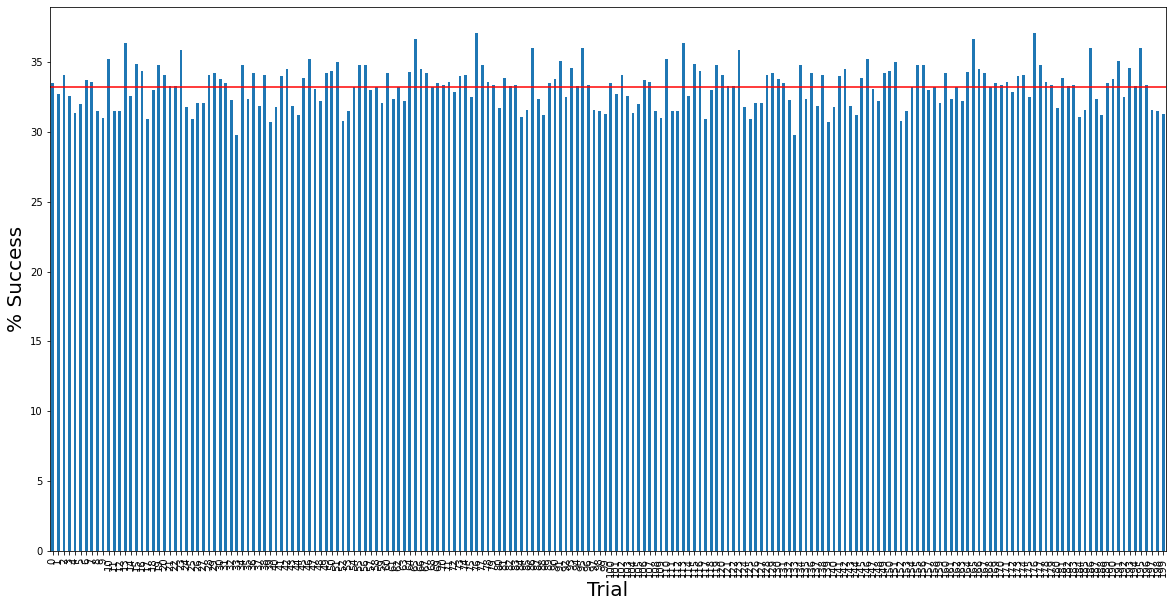

In [149]:
plt.figure(figsize=(20, 10))
trial_df['% Success'].plot(kind='bar')
plt.axhline(y = trial_df['% Success'].mean(), color = 'r', linestyle = '-')
plt.xlabel('Trial', fontsize=20)
plt.ylabel('% Success',fontsize=20)
# plt.axes.get_xaxis().set_visible(False)


# P-Value

Out of 100 Trials of 100 Die-Tosses, the average rate of 6 facing up is 17.70265%

In [154]:
actual_mean = (n*trial_mean)/100
actual_mean

332.44

Use Probability given Null Hypothesis is True

$X-Binom(1000, 0.166)$

Calculate probability of the event and more extreme cases. Ie 3306 times out of 10000 where 6 will appear face up. And also more than 3306.

$P(X=3306)+P(X=3307)+ .... + P(X=9999) + P(X=10000)$

In [151]:
import scipy.stats as stats

In [152]:
stats.binom(n=n, p=p).pmf(130)

2.9607375919420223e-48

In [156]:
stats.binom(n=n, p=p).cdf(actual_mean)

0.5682102636871594

In [155]:
p_value = 1 - stats.binom(n=n, p=p).cdf(actual_mean)
p_value = round(p_value, 7)
p_value

0.4317897